In [ ]:
!pip install --pre pycaret[full]

In [ ]:
pip install pycaret-ts-alpha 

In [ ]:
conda install -c conda-forge requests_mock

In [ ]:
pip install --upgrade pip setuptools

In [ ]:
pip install pandas==1.4.4
pip install pyyaml==5.4.1
pip install lightgbm==4.4.0
pip install yellowbrick==1.5

In [ ]:
pip install pyyaml==5.4.1

In [ ]:
python -m venv myenv
source myenv/bin/activate  # No Windows, use `myenv\Scripts\activate`
pip install --upgrade pip setuptools

In [ ]:
pip install pycaret-ts-alpha

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pycaret.time_series import *
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment
from sktime.utils.plotting import plot_series

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Carregar o arquivo CSV
file_path = r'C:\ES\IHM\MiningProcess_Flotation_Plant_Database.csv'
df_inicial = pd.read_csv(file_path, delimiter=',', decimal=',')

In [4]:
# Converter a coluna 'date' para datetime
df_inicial['date'] = pd.to_datetime(df_inicial['date'])

In [136]:
df_inicial.tail()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
Flotation Column 05 Level,0.023288,-0.043753,-0.055528,-0.211712,0.002260,0.013041,-0.140881,-0.091386,-0.110512,-0.063693,...,-0.209300,0.325619,0.267095,0.322605,0.682411,1.000000,0.570129,0.710699,0.160824,-0.169170
Flotation Column 06 Level,0.003694,-0.019502,-0.071722,-0.197758,-0.016661,-0.075034,-0.099817,-0.118992,-0.117619,-0.100419,...,-0.245115,0.300254,0.285417,0.300531,0.508210,0.570129,1.000000,0.606954,0.082300,-0.102443
Flotation Column 07 Level,0.025723,-0.046413,-0.038193,-0.168050,0.016585,0.019021,-0.086067,-0.110726,-0.112403,-0.085294,...,-0.237407,0.304846,0.235565,0.264239,0.619252,0.710699,0.606954,1.000000,0.146508,-0.141387
% Iron Concentrate,0.055424,-0.044168,0.069657,-0.110148,0.083120,0.192992,0.015580,0.098599,0.058744,0.100136,...,-0.002447,-0.014223,-0.026048,-0.022084,0.137019,0.160824,0.082300,0.146508,1.000000,-0.800560
% Silica Concentrate,-0.077052,0.072724,-0.066394,0.156701,0.008222,-0.147739,0.046984,-0.219158,-0.167398,-0.218891,...,-0.071776,0.017217,0.030955,0.014246,-0.149456,-0.169170,-0.102443,-0.141387,-0.800560,1.000000


In [137]:
df_inicial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, % Iron Feed to % Silica Concentrate
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   % Iron Feed                   23 non-null     float64
 1   % Silica Feed                 23 non-null     float64
 2   Starch Flow                   23 non-null     float64
 3   Amina Flow                    23 non-null     float64
 4   Ore Pulp Flow                 23 non-null     float64
 5   Ore Pulp pH                   23 non-null     float64
 6   Ore Pulp Density              23 non-null     float64
 7   Flotation Column 01 Air Flow  23 non-null     float64
 8   Flotation Column 02 Air Flow  23 non-null     float64
 9   Flotation Column 03 Air Flow  23 non-null     float64
 10  Flotation Column 04 Air Flow  23 non-null     float64
 11  Flotation Column 05 Air Flow  23 non-null     float64
 12  Flotation Column 06 Air Flow  23 non-null  

In [5]:
print(df_inicial['date'].head())

0   2017-03-10 01:00:00
1   2017-03-10 01:00:00
2   2017-03-10 01:00:00
3   2017-03-10 01:00:00
4   2017-03-10 01:00:00
Name: date, dtype: datetime64[ns]


In [6]:
# Função para limpar colunas numéricas
def clean_numeric_columns(df):
    numeric_cols = df.columns[1:]  # Excluir a coluna 'date'
    for col in numeric_cols:
        # Converter para string, remover vírgulas e converter para numérico
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')
    return df

In [7]:
# Aplicar a limpeza de colunas numéricas
df_inicial = clean_numeric_columns(df_inicial)

In [8]:
df_inicial.set_index('date', drop=True, inplace=True)

In [9]:
df_inicial

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 23:00:00,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,299.163,...,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
2017-09-09 23:00:00,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,...,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
2017-09-09 23:00:00,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,299.487,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71


In [10]:
# Agrupar por 'date' e calcular a média, min, max e desvio padrão
aggregated_df = df_inicial.groupby('date').agg(['mean','median', 'min', 'max', 'std']).reset_index()


In [11]:
aggregated_df

date % Iron Feed                           % Silica Feed  \
                                mean median    min    max  std          mean   
0    2017-03-10 01:00:00       55.20  55.20  55.20  55.20  0.0         16.98   
1    2017-03-10 02:00:00       55.20  55.20  55.20  55.20  0.0         16.98   
2    2017-03-10 03:00:00       55.20  55.20  55.20  55.20  0.0         16.98   
3    2017-03-10 04:00:00       55.20  55.20  55.20  55.20  0.0         16.98   
4    2017-03-10 05:00:00       55.20  55.20  55.20  55.20  0.0         16.98   
...                  ...         ...    ...    ...    ...  ...           ...   
4092 2017-09-09 19:00:00       49.75  49.75  49.75  49.75  0.0         23.20   
4093 2017-09-09 20:00:00       49.75  49.75  49.75  49.75  0.0         23.20   
4094 2017-09-09 21:00:00       49.75  49.75  49.75  49.75  0.0         23.20   
4095 2017-09-09 22:00:00       49.75  49.75  49.75  49.75  0.0         23.20   
4096 2017-09-09 23:00:00       49.75  49.75  49.75  49.75  0.0         23.20   

                           ... % Iron Concentrate                            \
     median    min    max  ...               mean median    min    max  std   
0     16.98  16.98  16.98  ...              66.91  66.91  66.91  66.91  0.0   
1     16.98  16.98  16.98  ...              67.06  67.06  67.06  67.06  0.0   
2     16.98  16.98  16.98  ...              66.97  66.97  66.97  66.97  0.0   
3     16.98  16.98  16.98  ...              66.75  66.75  66.75  66.75  0.0   
4     16.98  16.98  16.98  ...              66.63  66.63  66.63  66.63  0.0   
...     ...    ...    ...  ...                ...    ...    ...    ...  ...   
4092  23.20  23.20  23.20  ...              65.05  65.05  65.05  65.05  0.0   
4093  23.20  23.20  23.20  ...              64.83  64.83  64.83  64.83  0.0   
4094  23.20  23.20  23.20  ...              64.29  64.29  64.29  64.29  0.0   
4095  23.20  23.20  23.20  ...              64.25  64.25  64.25  64.25  0.0   
4096  23.20  23.20  23.20  ...              64.27  64.27  64.27  64.27  0.0   

     % Silica Concentrate                          
                     mean median   min   max  std  
0                    1.31   1.31  1.31  1.31  0.0  
1                    1.11   1.11  1.11  1.11  0.0  
2                    1.27   1.27  1.27  1.27  0.0  
3                    1.36   1.36  1.36  1.36  0.0  
4                    1.34   1.34  1.34  1.34  0.0  
...                   ...    ...   ...   ...  ...  
4092                 1.65   1.65  1.65  1.65  0.0  
4093                 1.71   1.71  1.71  1.71  0.0  
4094                 1.80   1.80  1.80  1.80  0.0  
4095                 1.96   1.96  1.96  1.96  0.0  
4096                 1.71   1.71  1.71  1.71  0.0  

[4097 rows x 116 columns]

In [12]:
# Renomear colunas para um formato mais amigável
aggregated_df.columns = ['_'.join(col).strip() if col[1] else col[0] for col in aggregated_df.columns.values]


In [13]:
aggregated_df

,date,% Iron Feed_mean,% Iron Feed_median,% Iron Feed_min,% Iron Feed_max,% Iron Feed_std,% Silica Feed_mean,% Silica Feed_median,% Silica Feed_min,% Silica Feed_max,...,% Iron Concentrate_mean,% Iron Concentrate_median,% Iron Concentrate_min,% Iron Concentrate_max,% Iron Concentrate_std,% Silica Concentrate_mean,% Silica Concentrate_median,% Silica Concentrate_min,% Silica Concentrate_max,% Silica Concentrate_std
0,2017-03-10 01:00:00,55.20,55.20,55.20,55.20,0.0,16.98,16.98,16.98,16.98,...,66.91,66.91,66.91,66.91,0.0,1.31,1.31,1.31,1.31,0.0
1,2017-03-10 02:00:00,55.20,55.20,55.20,55.20,0.0,16.98,16.98,16.98,16.98,...,67.06,67.06,67.06,67.06,0.0,1.11,1.11,1.11,1.11,0.0
2,2017-03-10 03:00:00,55.20,55.20,55.20,55.20,0.0,16.98,16.98,16.98,16.98,...,66.97,66.97,66.97,66.97,0.0,1.27,1.27,1.27,1.27,0.0
3,2017-03-10 04:00:00,55.20,55.20,55.20,55.20,0.0,16.98,16.98,16.98,16.98,...,66.75,66.75,66.75,66.75,0.0,1.36,1.36,1.36,1.36,0.0
4,2017-03-10 05:00:00,55.20,55.20,55.20,55.20,0.0,16.98,16.98,16.98,16.98,...,66.63,66.63,66.63,66.63,0.0,1.34,1.34,1.34,1.34,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4092,2017-09-09 19:00:00,49.75,49.75,49.75,49.75,0.0,23.20,23.20,23.20,23.20,...,65.05,65.05,65.05,65.05,0.0,1.65,1.65,1.65,1.65,0.0
4093,2017-09-09 20:00:00,49.75,49.75,49.75,49.75,0.0,23.20,23.20,23.20,23.20,...,64.83,64.83,64.83,64.83,0.0,1.71,1.71,1.71,1.71,0.0
4094,2017-09-09 21:00:00,49.75,49.75,49.75,49.75,0.0,23.20,23.20,23.20,23.20,...,64.29,64.29,64.29,64.29,0.0,1.80,1.80,1.80,1.80,0.0
4095,2017-09-09 22:00:00,49.75,49.75,49.75,49.75,0.0,23.20,23.20,23.20,23.20,...,64.25,64.25,64.25,64.25,0.0,1.96,1.96,1.96,1.96,0.0


In [ ]:
# Exibir os tipos de dados das colunas do DataFrame agregado
#print(aggregated_df.dtypes)


In [ ]:
#print(aggregated_df.columns)

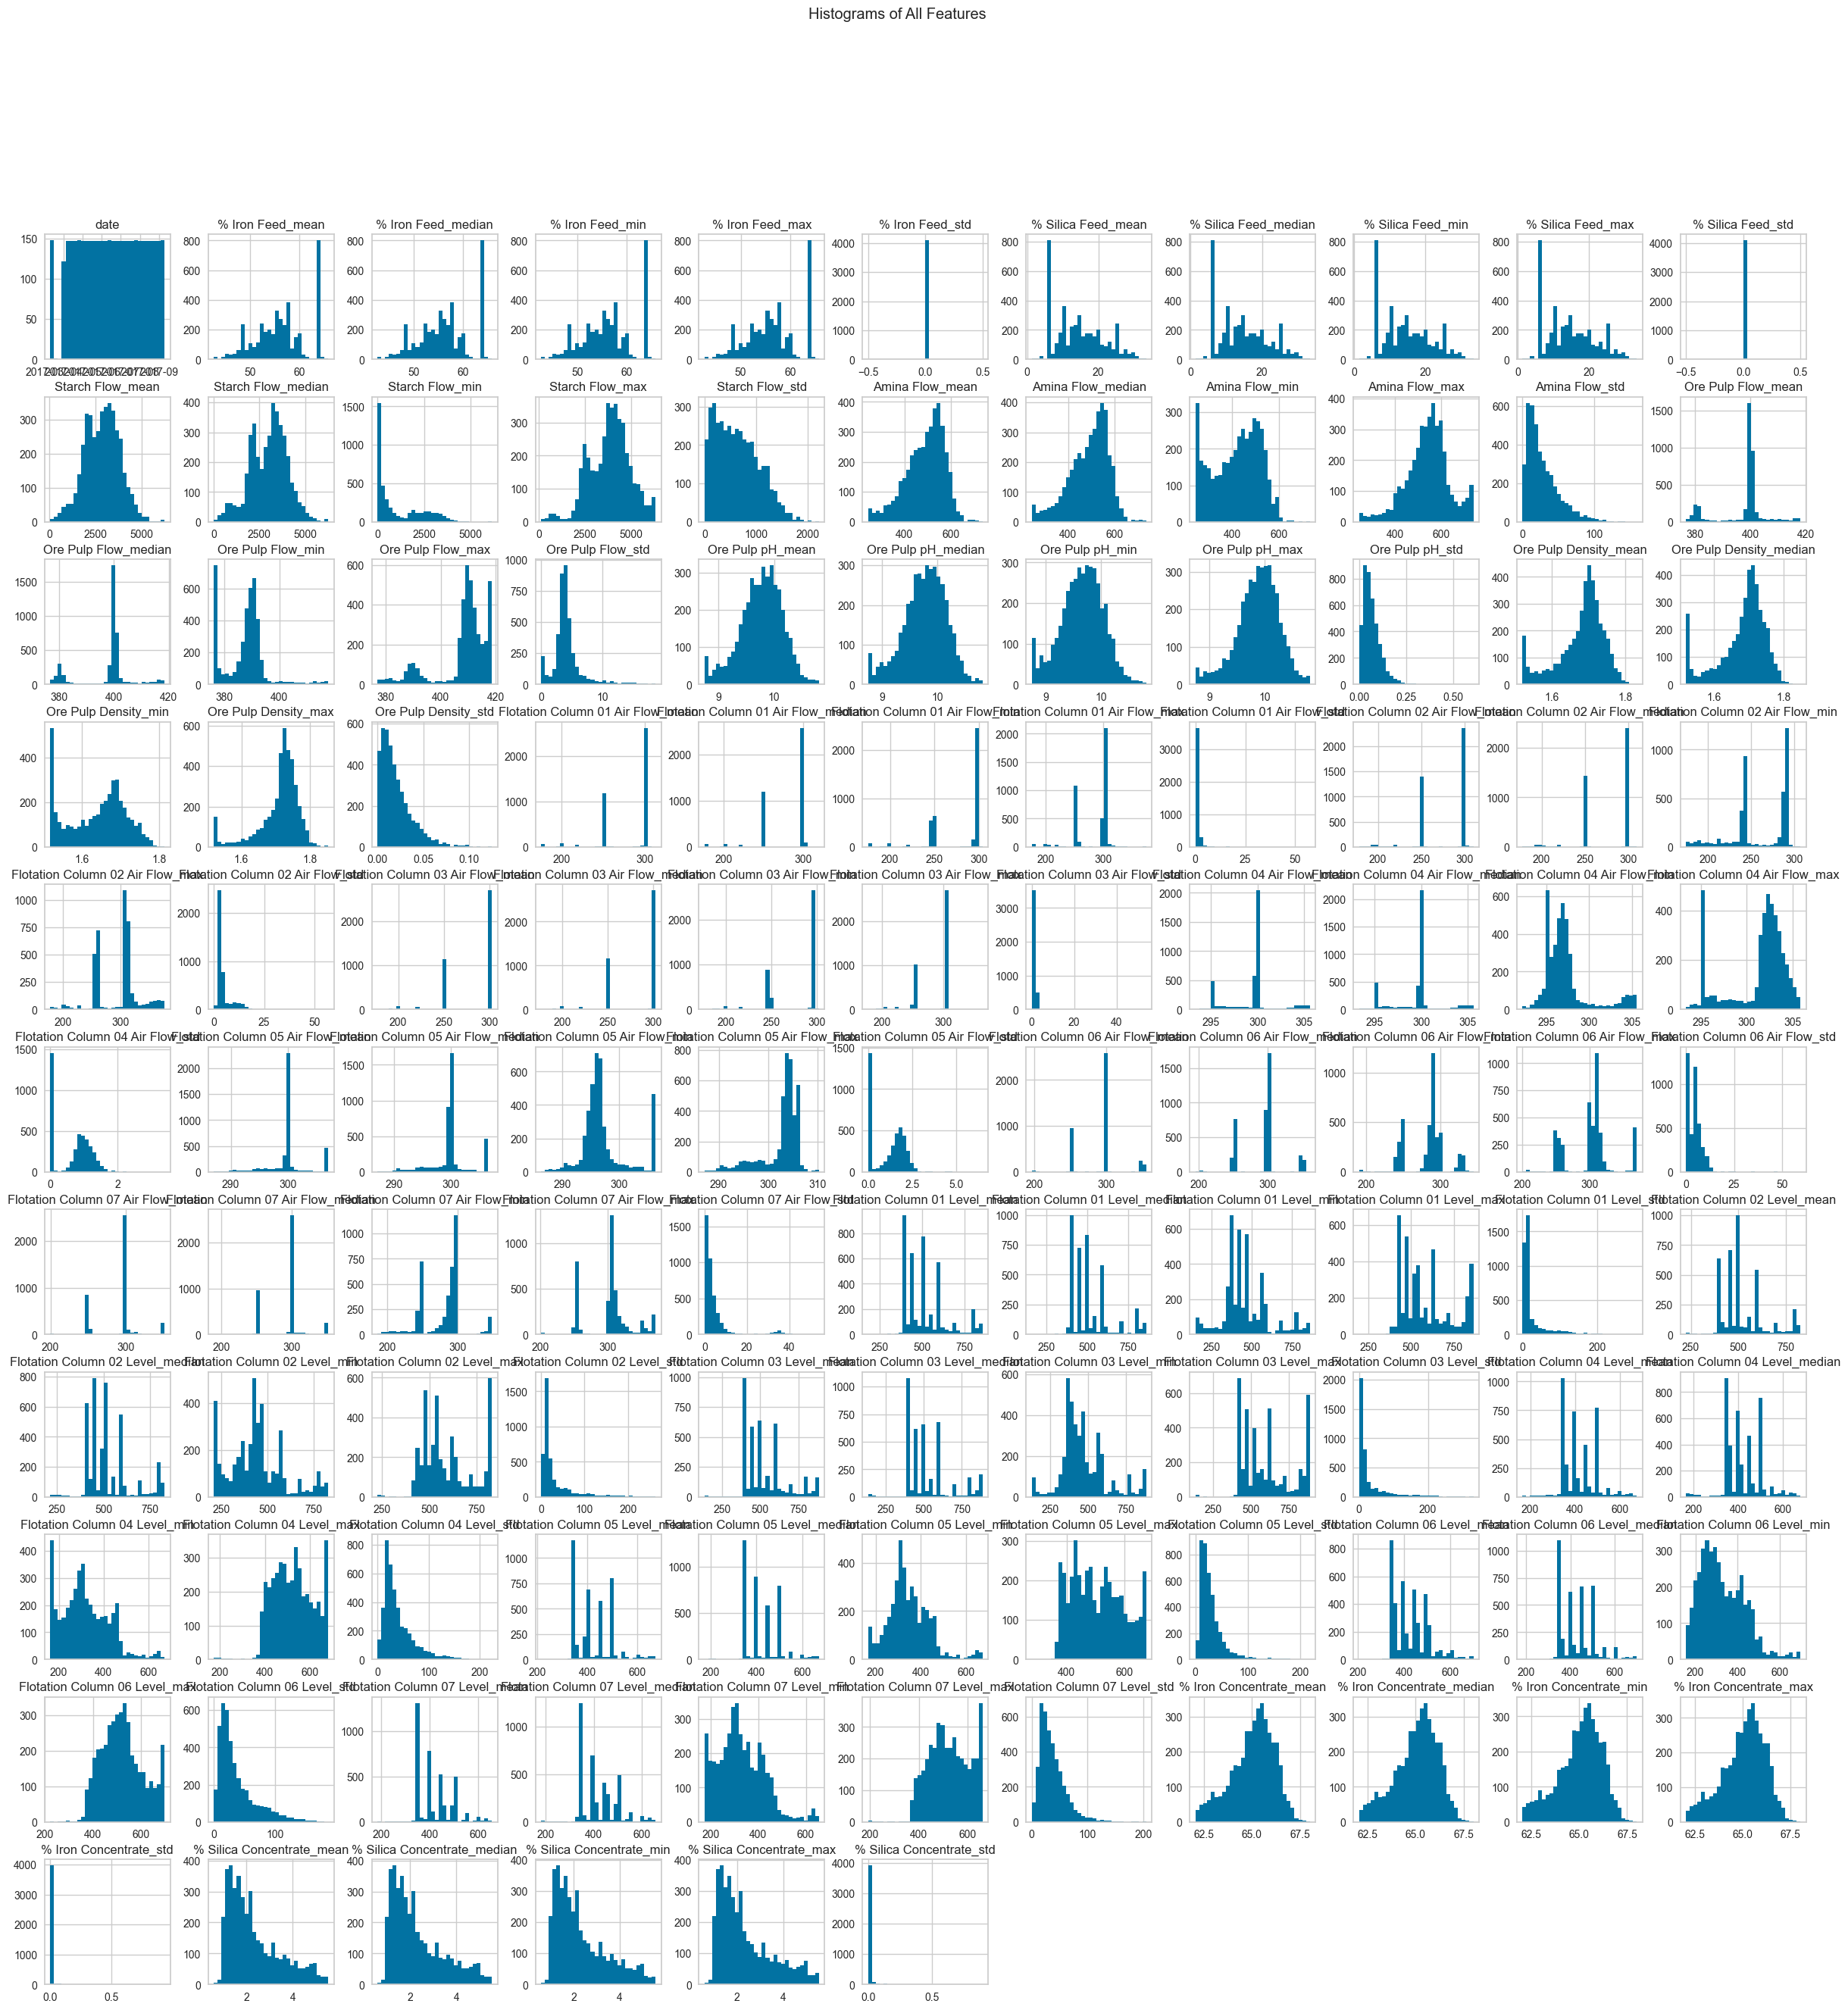

In [14]:
aggregated_df.hist(figsize=(30, 30), bins=30)
plt.suptitle('Histograms of All Features')
plt.show()

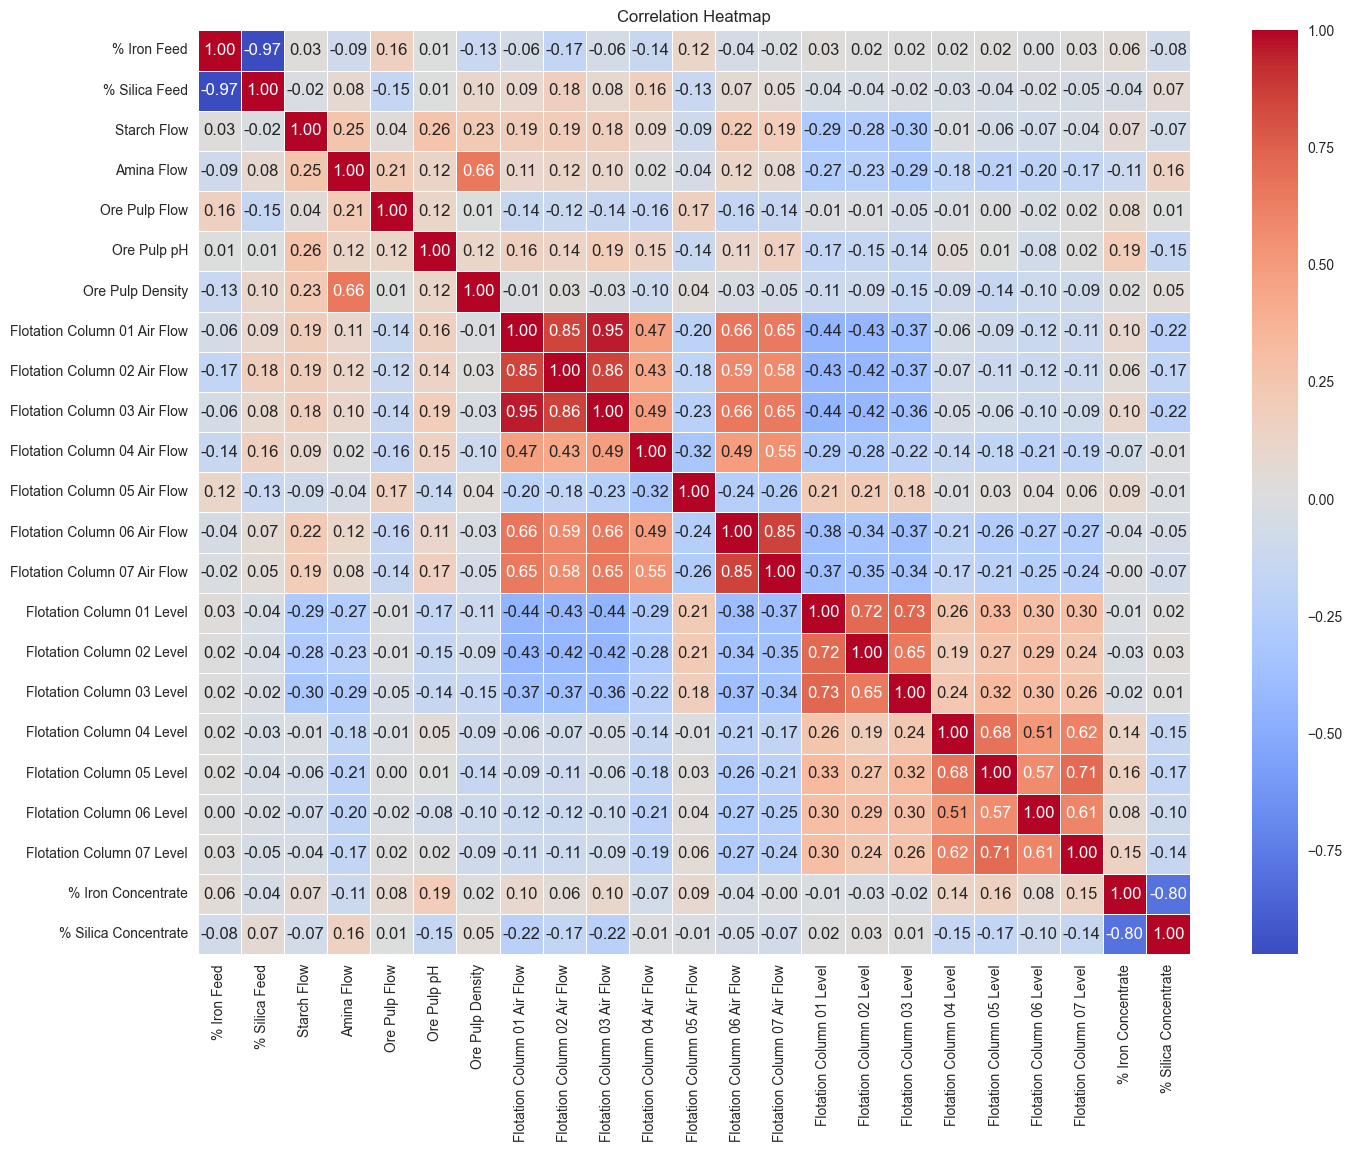

In [15]:
#Correlation heatmap
plt.figure(figsize=(16, 12))
df_inicial = df_inicial.corr()
sns.heatmap(df_inicial, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [16]:
# Selecionar apenas as colunas que terminam com '_mean'
mean_columns = [col for col in aggregated_df.columns if col.endswith('_mean')]
# Exibir as colunas de média
for col in mean_columns:
    print(col)

% Iron Feed_mean
% Silica Feed_mean
Starch Flow_mean
Amina Flow_mean
Ore Pulp Flow_mean
Ore Pulp pH_mean
Ore Pulp Density_mean
Flotation Column 01 Air Flow_mean
Flotation Column 02 Air Flow_mean
Flotation Column 03 Air Flow_mean
Flotation Column 04 Air Flow_mean
Flotation Column 05 Air Flow_mean
Flotation Column 06 Air Flow_mean
Flotation Column 07 Air Flow_mean
Flotation Column 01 Level_mean
Flotation Column 02 Level_mean
Flotation Column 03 Level_mean
Flotation Column 04 Level_mean
Flotation Column 05 Level_mean
Flotation Column 06 Level_mean
Flotation Column 07 Level_mean
% Iron Concentrate_mean
% Silica Concentrate_mean


In [17]:
# Definir os sufixos desejados
#desired_suffixes = ['date','_mean', '_std']

# Selecionar as colunas que terminam com os sufixos desejados
#amostra_columns = [col for col in aggregated_df.columns if any(col.endswith(suffix) for suffix in desired_suffixes)]

# Exibir as colunas selecionadas
#for col in amostra_columns:
   # print(col)

In [18]:
#base_modelagem = amostra_columns

In [19]:
aggregated_df

,date,% Iron Feed_mean,% Iron Feed_median,% Iron Feed_min,% Iron Feed_max,% Iron Feed_std,% Silica Feed_mean,% Silica Feed_median,% Silica Feed_min,% Silica Feed_max,...,% Iron Concentrate_mean,% Iron Concentrate_median,% Iron Concentrate_min,% Iron Concentrate_max,% Iron Concentrate_std,% Silica Concentrate_mean,% Silica Concentrate_median,% Silica Concentrate_min,% Silica Concentrate_max,% Silica Concentrate_std
0,2017-03-10 01:00:00,55.20,55.20,55.20,55.20,0.0,16.98,16.98,16.98,16.98,...,66.91,66.91,66.91,66.91,0.0,1.31,1.31,1.31,1.31,0.0
1,2017-03-10 02:00:00,55.20,55.20,55.20,55.20,0.0,16.98,16.98,16.98,16.98,...,67.06,67.06,67.06,67.06,0.0,1.11,1.11,1.11,1.11,0.0
2,2017-03-10 03:00:00,55.20,55.20,55.20,55.20,0.0,16.98,16.98,16.98,16.98,...,66.97,66.97,66.97,66.97,0.0,1.27,1.27,1.27,1.27,0.0
3,2017-03-10 04:00:00,55.20,55.20,55.20,55.20,0.0,16.98,16.98,16.98,16.98,...,66.75,66.75,66.75,66.75,0.0,1.36,1.36,1.36,1.36,0.0
4,2017-03-10 05:00:00,55.20,55.20,55.20,55.20,0.0,16.98,16.98,16.98,16.98,...,66.63,66.63,66.63,66.63,0.0,1.34,1.34,1.34,1.34,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4092,2017-09-09 19:00:00,49.75,49.75,49.75,49.75,0.0,23.20,23.20,23.20,23.20,...,65.05,65.05,65.05,65.05,0.0,1.65,1.65,1.65,1.65,0.0
4093,2017-09-09 20:00:00,49.75,49.75,49.75,49.75,0.0,23.20,23.20,23.20,23.20,...,64.83,64.83,64.83,64.83,0.0,1.71,1.71,1.71,1.71,0.0
4094,2017-09-09 21:00:00,49.75,49.75,49.75,49.75,0.0,23.20,23.20,23.20,23.20,...,64.29,64.29,64.29,64.29,0.0,1.80,1.80,1.80,1.80,0.0
4095,2017-09-09 22:00:00,49.75,49.75,49.75,49.75,0.0,23.20,23.20,23.20,23.20,...,64.25,64.25,64.25,64.25,0.0,1.96,1.96,1.96,1.96,0.0


In [20]:
prep_banco = aggregated_df

In [21]:
# Renomear as colunas
prep_banco.columns = prep_banco.columns.str.replace(' ', '_').str.replace('%', 'pct_')


In [22]:
prep_banco

,date,pct__Iron_Feed_mean,pct__Iron_Feed_median,pct__Iron_Feed_min,pct__Iron_Feed_max,pct__Iron_Feed_std,pct__Silica_Feed_mean,pct__Silica_Feed_median,pct__Silica_Feed_min,pct__Silica_Feed_max,...,pct__Iron_Concentrate_mean,pct__Iron_Concentrate_median,pct__Iron_Concentrate_min,pct__Iron_Concentrate_max,pct__Iron_Concentrate_std,pct__Silica_Concentrate_mean,pct__Silica_Concentrate_median,pct__Silica_Concentrate_min,pct__Silica_Concentrate_max,pct__Silica_Concentrate_std
0,2017-03-10 01:00:00,55.20,55.20,55.20,55.20,0.0,16.98,16.98,16.98,16.98,...,66.91,66.91,66.91,66.91,0.0,1.31,1.31,1.31,1.31,0.0
1,2017-03-10 02:00:00,55.20,55.20,55.20,55.20,0.0,16.98,16.98,16.98,16.98,...,67.06,67.06,67.06,67.06,0.0,1.11,1.11,1.11,1.11,0.0
2,2017-03-10 03:00:00,55.20,55.20,55.20,55.20,0.0,16.98,16.98,16.98,16.98,...,66.97,66.97,66.97,66.97,0.0,1.27,1.27,1.27,1.27,0.0
3,2017-03-10 04:00:00,55.20,55.20,55.20,55.20,0.0,16.98,16.98,16.98,16.98,...,66.75,66.75,66.75,66.75,0.0,1.36,1.36,1.36,1.36,0.0
4,2017-03-10 05:00:00,55.20,55.20,55.20,55.20,0.0,16.98,16.98,16.98,16.98,...,66.63,66.63,66.63,66.63,0.0,1.34,1.34,1.34,1.34,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4092,2017-09-09 19:00:00,49.75,49.75,49.75,49.75,0.0,23.20,23.20,23.20,23.20,...,65.05,65.05,65.05,65.05,0.0,1.65,1.65,1.65,1.65,0.0
4093,2017-09-09 20:00:00,49.75,49.75,49.75,49.75,0.0,23.20,23.20,23.20,23.20,...,64.83,64.83,64.83,64.83,0.0,1.71,1.71,1.71,1.71,0.0
4094,2017-09-09 21:00:00,49.75,49.75,49.75,49.75,0.0,23.20,23.20,23.20,23.20,...,64.29,64.29,64.29,64.29,0.0,1.80,1.80,1.80,1.80,0.0
4095,2017-09-09 22:00:00,49.75,49.75,49.75,49.75,0.0,23.20,23.20,23.20,23.20,...,64.25,64.25,64.25,64.25,0.0,1.96,1.96,1.96,1.96,0.0


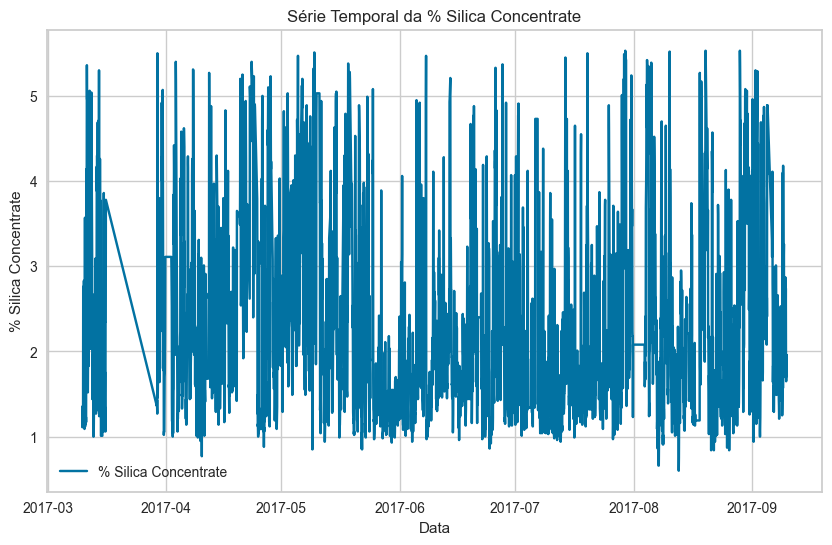

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(prep_banco['date'], prep_banco['pct__Silica_Concentrate_mean'], label='% Silica Concentrate', color='b')
plt.xlabel('Data')
plt.ylabel('% Silica Concentrate')
plt.title('Série Temporal da % Silica Concentrate')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Exibir todas as colunas do DataFrame, uma abaixo da outra
print("Colunas do prep_banco:")
for coluna in prep_banco.columns:
    print(coluna)

Colunas do prep_banco:
date
pct__Iron_Feed_mean
pct__Iron_Feed_median
pct__Iron_Feed_min
pct__Iron_Feed_max
pct__Iron_Feed_std
pct__Silica_Feed_mean
pct__Silica_Feed_median
pct__Silica_Feed_min
pct__Silica_Feed_max
pct__Silica_Feed_std
Starch_Flow_mean
Starch_Flow_median
Starch_Flow_min
Starch_Flow_max
Starch_Flow_std
Amina_Flow_mean
Amina_Flow_median
Amina_Flow_min
Amina_Flow_max
Amina_Flow_std
Ore_Pulp_Flow_mean
Ore_Pulp_Flow_median
Ore_Pulp_Flow_min
Ore_Pulp_Flow_max
Ore_Pulp_Flow_std
Ore_Pulp_pH_mean
Ore_Pulp_pH_median
Ore_Pulp_pH_min
Ore_Pulp_pH_max
Ore_Pulp_pH_std
Ore_Pulp_Density_mean
Ore_Pulp_Density_median
Ore_Pulp_Density_min
Ore_Pulp_Density_max
Ore_Pulp_Density_std
Flotation_Column_01_Air_Flow_mean
Flotation_Column_01_Air_Flow_median
Flotation_Column_01_Air_Flow_min
Flotation_Column_01_Air_Flow_max
Flotation_Column_01_Air_Flow_std
Flotation_Column_02_Air_Flow_mean
Flotation_Column_02_Air_Flow_median
Flotation_Column_02_Air_Flow_min
Flotation_Column_02_Air_Flow_max
Flotation

In [25]:
# Filtrar as colunas que terminam com '_mean'
mean_columns = [col for col in prep_banco.columns if col.endswith('_mean')]

In [26]:
# Adicionar a coluna 'date' à lista de colunas selecionadas
selected_columns = ['date'] + mean_columns

In [27]:
# Criar um novo DataFrame com as colunas selecionadas
new_df = prep_banco[selected_columns]

In [28]:
# Exibir o novo DataFrame
print(new_df)

                    date  pct__Iron_Feed_mean  pct__Silica_Feed_mean  \
0    2017-03-10 01:00:00                55.20                  16.98   
1    2017-03-10 02:00:00                55.20                  16.98   
2    2017-03-10 03:00:00                55.20                  16.98   
3    2017-03-10 04:00:00                55.20                  16.98   
4    2017-03-10 05:00:00                55.20                  16.98   
...                  ...                  ...                    ...   
4092 2017-09-09 19:00:00                49.75                  23.20   
4093 2017-09-09 20:00:00                49.75                  23.20   
4094 2017-09-09 21:00:00                49.75                  23.20   
4095 2017-09-09 22:00:00                49.75                  23.20   
4096 2017-09-09 23:00:00                49.75                  23.20   

      Starch_Flow_mean  Amina_Flow_mean  Ore_Pulp_Flow_mean  Ore_Pulp_pH_mean  \
0          3162.625026       578.786678          398.7

In [29]:
# Criar um novo DataFrame apenas com as colunas desejadas
base_modelagem = new_df

In [30]:
# Converter a coluna 'date' para datetime
base_modelagem['date'] = pd.to_datetime(base_modelagem['date'])

In [31]:
# Definir a data limite para treinamento e validação
split_date = pd.to_datetime('2017-08-07')

# Dividir os dados em treinamento e validação
train_data = base_modelagem[base_modelagem['date'] < split_date]
val_data = base_modelagem[base_modelagem['date'] >= split_date]

In [32]:
# Exemplo de visualização dos primeiros registros de cada conjunto de dados
print("Exemplo de conjuntos de treinamento e validação:")
print(f"Treinamento: {len(train_data)} registros")
print(f"Validação: {len(val_data)} registros")

Exemplo de conjuntos de treinamento e validação:
Treinamento: 3281 registros
Validação: 816 registros


In [33]:
# Calcular o percentual de casos em cada conjunto
total_cases = len(base_modelagem)
train_cases = len(train_data)
val_cases = len(val_data)

percent_train = (train_cases / total_cases) * 100
percent_val = (val_cases / total_cases) * 100

print(f"Percentual de casos no conjunto de treinamento: {percent_train:.2f}%")
print(f"Percentual de casos no conjunto de validação: {percent_val:.2f}%")

Percentual de casos no conjunto de treinamento: 80.08%
Percentual de casos no conjunto de validação: 19.92%


In [34]:
# Data inicial e final da série da amostra de treino
min_date = train_data['date'].min()
print(f'The min date is {min_date}')
max_date = train_data['date'].max()
print(f'The max date is {max_date}')

The min date is 2017-03-10 01:00:00
The max date is 2017-08-06 23:00:00


In [35]:
# Data inicial e final da série da amostra de validação
min_date = val_data['date'].min()
print(f'The min date is {min_date}')
max_date = val_data['date'].max()
print(f'The max date is {max_date}')

The min date is 2017-08-07 00:00:00
The max date is 2017-09-09 23:00:00


In [36]:
# Informações gerais sobre o DataFrame
print(base_modelagem.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4097 entries, 0 to 4096
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   date                               4097 non-null   datetime64[ns]
 1   pct__Iron_Feed_mean                4097 non-null   float64       
 2   pct__Silica_Feed_mean              4097 non-null   float64       
 3   Starch_Flow_mean                   4097 non-null   float64       
 4   Amina_Flow_mean                    4097 non-null   float64       
 5   Ore_Pulp_Flow_mean                 4097 non-null   float64       
 6   Ore_Pulp_pH_mean                   4097 non-null   float64       
 7   Ore_Pulp_Density_mean              4097 non-null   float64       
 8   Flotation_Column_01_Air_Flow_mean  4097 non-null   float64       
 9   Flotation_Column_02_Air_Flow_mean  4097 non-null   float64       
 10  Flotation_Column_03_Air_Flow_mean  4

In [37]:
train_data

,date,pct__Iron_Feed_mean,pct__Silica_Feed_mean,Starch_Flow_mean,Amina_Flow_mean,Ore_Pulp_Flow_mean,Ore_Pulp_pH_mean,Ore_Pulp_Density_mean,Flotation_Column_01_Air_Flow_mean,Flotation_Column_02_Air_Flow_mean,...,Flotation_Column_07_Air_Flow_mean,Flotation_Column_01_Level_mean,Flotation_Column_02_Level_mean,Flotation_Column_03_Level_mean,Flotation_Column_04_Level_mean,Flotation_Column_05_Level_mean,Flotation_Column_06_Level_mean,Flotation_Column_07_Level_mean,pct__Iron_Concentrate_mean,pct__Silica_Concentrate_mean
0,2017-03-10 01:00:00,55.20,16.98,3162.625026,578.786678,398.753368,10.113487,1.729558,251.166672,250.226086,...,250.208184,450.383776,446.891845,450.474523,449.912259,455.792161,464.383310,450.532747,66.91,1.31
1,2017-03-10 02:00:00,55.20,16.98,3133.256389,537.219661,399.871822,10.129742,1.667784,249.880589,250.214050,...,249.897572,449.373361,450.249356,450.081222,450.328806,448.722983,455.501528,451.387700,67.06,1.11
2,2017-03-10 03:00:00,55.20,16.98,3479.482944,591.906744,398.763806,10.048403,1.732711,250.161328,250.104167,...,250.484183,449.972878,450.868711,450.901822,451.145822,451.134189,459.981311,450.296722,66.97,1.27
3,2017-03-10 04:00:00,55.20,16.98,3228.036436,593.170106,399.866983,9.918614,1.731056,250.208772,250.204761,...,250.157622,487.940706,491.462111,487.387206,494.528183,495.664011,502.763850,494.939889,66.75,1.36
4,2017-03-10 05:00:00,55.20,16.98,3327.280739,619.710806,399.615089,9.746029,1.765879,249.917800,250.160494,...,250.078639,549.031539,549.983156,549.459572,549.975483,549.512533,560.696300,550.271772,66.63,1.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3276,2017-08-06 19:00:00,54.43,17.29,3013.461667,507.321811,381.028939,9.761618,1.711180,299.903411,299.905611,...,250.158194,400.356267,499.896706,398.816806,349.695206,347.614656,349.956417,349.604644,64.70,1.97
3277,2017-08-06 20:00:00,54.43,17.29,2389.456722,468.478539,378.967064,9.873999,1.681281,299.646600,299.767483,...,250.034361,399.641017,500.596267,399.333606,349.430211,351.175933,350.048706,349.221583,64.80,2.24
3278,2017-08-06 21:00:00,54.43,17.29,2521.177611,544.954628,381.128578,9.800920,1.703249,299.819828,299.876372,...,250.035567,399.872933,499.609472,399.703861,401.973489,400.094067,401.344939,401.613544,65.19,1.73
3279,2017-08-06 22:00:00,54.43,17.29,3160.592611,533.799906,394.198503,9.908214,1.694354,299.908261,299.524983,...,249.969739,401.002250,500.855228,404.020889,450.990439,452.319922,462.569139,462.109017,64.71,2.37


In [115]:
# Seleção de variáveis de entrada e saída
features = ['date',
 'pct__Iron_Feed_mean',
'pct__Silica_Feed_mean',
'Starch_Flow_mean',
'Amina_Flow_mean',
'Ore_Pulp_Flow_mean',
'Ore_Pulp_pH_mean',
'Ore_Pulp_Density_mean',
'Flotation_Column_01_Air_Flow_mean',
'Flotation_Column_02_Air_Flow_mean',
'Flotation_Column_03_Air_Flow_mean',
'Flotation_Column_04_Air_Flow_mean',
'Flotation_Column_05_Air_Flow_mean',
'Flotation_Column_06_Air_Flow_mean',
'Flotation_Column_07_Air_Flow_mean',
'Flotation_Column_01_Level_mean',
'Flotation_Column_02_Level_mean',
'Flotation_Column_03_Level_mean',
'Flotation_Column_04_Level_mean',
'Flotation_Column_05_Level_mean',
'Flotation_Column_06_Level_mean',
'Flotation_Column_07_Level_mean',
'pct__Iron_Concentrate_mean']
target = 'pct__Silica_Concentrate_mean'  # Variável alvo que você quer prever

### retirar = 'pct__Iron_Concentrate_mean'

In [116]:
# Selecionar as colunas de entrada e a variável alvo no DataFrame de treino
X_train = train_data[features]
y_train = train_data[target]


In [ ]:
# Converter a coluna 'date' para datetime
#train_data['date'] = pd.to_datetime(train_data['date'])

In [117]:
from sktime.forecasting.model_selection import SlidingWindowSplitter
# https://www.sktime.net/en/stable/api_reference/auto_generated/sktime.forecasting.model_selection.SlidingWindowSplitter.html

In [118]:
import numpy as np
from sktime.forecasting.model_selection import SlidingWindowSplitter
ts = np.arange(10)
splitter = SlidingWindowSplitter(fh=np.arange(1,3), window_length=3, step_length=1)
list(splitter.split(ts)) 

[(array([0, 1, 2], dtype=int64), array([3, 4])),
 (array([1, 2, 3], dtype=int64), array([4, 5])),
 (array([2, 3, 4], dtype=int64), array([5, 6])),
 (array([3, 4, 5], dtype=int64), array([6, 7])),
 (array([4, 5, 6], dtype=int64), array([7, 8])),
 (array([5, 6, 7], dtype=int64), array([8, 9]))]

In [119]:
train_data.size

78744

In [120]:
exp = TSForecastingExperiment()
exp.setup(data = train_data, target='pct__Silica_Concentrate_mean' ,coverage=0.90, fold_strategy=SlidingWindowSplitter(fh=np.arange(1,23), window_length=130, step_length=130)) # using the past 6 months data to make prediction for the next month and moving half a year forward. 

,Description,Value
0,session_id,7039
1,Target,pct__Silica_Concentrate_mean
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(3281, 24)"
5,Transformed data shape,"(3281, 24)"
6,Transformed train set shape,"(3259, 24)"
7,Transformed test set shape,"(22, 24)"
8,Rows with missing values,0.0%
9,Fold Generator,SlidingWindowSplitter


In [ ]:
# exp.plot_model(plot='train_test_split')

In [ ]:
# exp.plot_model(plot='cv')

In [121]:
exp.compare_models(sort='rmse')

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
croston,Croston,1.0111,0.8580,0.9702,1.1103,0.5341,0.4081,-3.4652,0.0258


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

Croston()

In [122]:
exp.models()

,Name,Reference,Turbo
ID,,,
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
croston,Croston,sktime.forecasting.croston.Croston,True
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsD...,True
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsD...,True
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsD...,True
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsD...,True
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,pycaret.containers.models.time_series.BaseCdsD...,True
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,pycaret.containers.models.time_series.BaseCdsD...,True


In [123]:
modelo1 = exp.create_model('croston')
modelo1

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,129.0000,0.3251,0.3733,0.6212,0.8340,0.3382,0.3206,-0.0000
1,259.0000,1.0176,0.9592,1.0854,1.2934,0.4775,0.3847,-0.0132
2,389.0000,1.3717,1.0728,1.3398,1.4415,1.0575,0.6266,-5.2505
3,519.0000,1.2958,1.0601,1.0784,1.1982,0.3934,0.4119,-0.3810
4,649.0000,1.6083,1.2817,1.5176,1.5315,0.4315,0.5406,-9.8748
5,779.0000,2.5224,2.1864,2.8246,2.8621,2.4841,1.0826,-37.4469
6,909.0000,0.3782,0.4174,0.5092,0.7223,0.1744,0.1942,-0.2569
7,1039.0000,0.9577,0.8838,0.8739,0.9867,0.2542,0.2295,-0.0202
8,1169.0000,1.5391,1.3918,2.0683,2.2849,1.1051,0.6081,-4.0819
9,1299.0000,0.6505,0.6717,0.8250,1.0887,0.2786,0.3387,-0.6911


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Croston()

In [124]:
y_predito = exp.predict_model(modelo1)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Croston,0.6031,0.5444,0.6285,0.7759,0.2275,0.2202,-0.0013


In [125]:
exp.save_model(modelo1, 'melhor_modelo', model_only=True)

Model Successfully Saved


(Croston(), 'melhor_modelo.pkl')

In [126]:
with open('melhor_modelo.pkl', 'wb') as file:
    pickle.dump(modelo_carregado, file)

In [127]:
modelo_carregado = exp.load_model('melhor_modelo')

Transformation Pipeline and Model Successfully Loaded


In [128]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [129]:
# Carregar o modelo treinado
with open('melhor_modelo.pkl', 'rb') as file:
    modelo_carregado = pickle.load(file)

In [130]:
# Supondo que 'test_data' seja o conjunto de dados de validação e 'X_test' seja preparado corretamente
# Definir o horizonte de previsão
fh = range(1, len(val_data) + 1)

In [131]:
# Garantir que 'X_test' não inclua a coluna de destino
X_test = val_data.drop(columns=['pct__Silica_Concentrate_mean'])

In [132]:
# Prever usando o modelo carregado
y_predito = modelo_carregado.predict(fh=fh, X=X_test)

In [133]:
# Converter as previsões para um DataFrame
y_pred_df = pd.DataFrame(y_predito, index=val_data.index, columns=['pct__Silica_Concentrate_mean'])

In [135]:
y_pred_df

,pct__Silica_Concentrate_mean
3281,2.780773
3282,2.780773
3283,2.780773
3284,2.780773
3285,2.780773
...,...
4092,NaN
4093,NaN
4094,NaN
4095,NaN


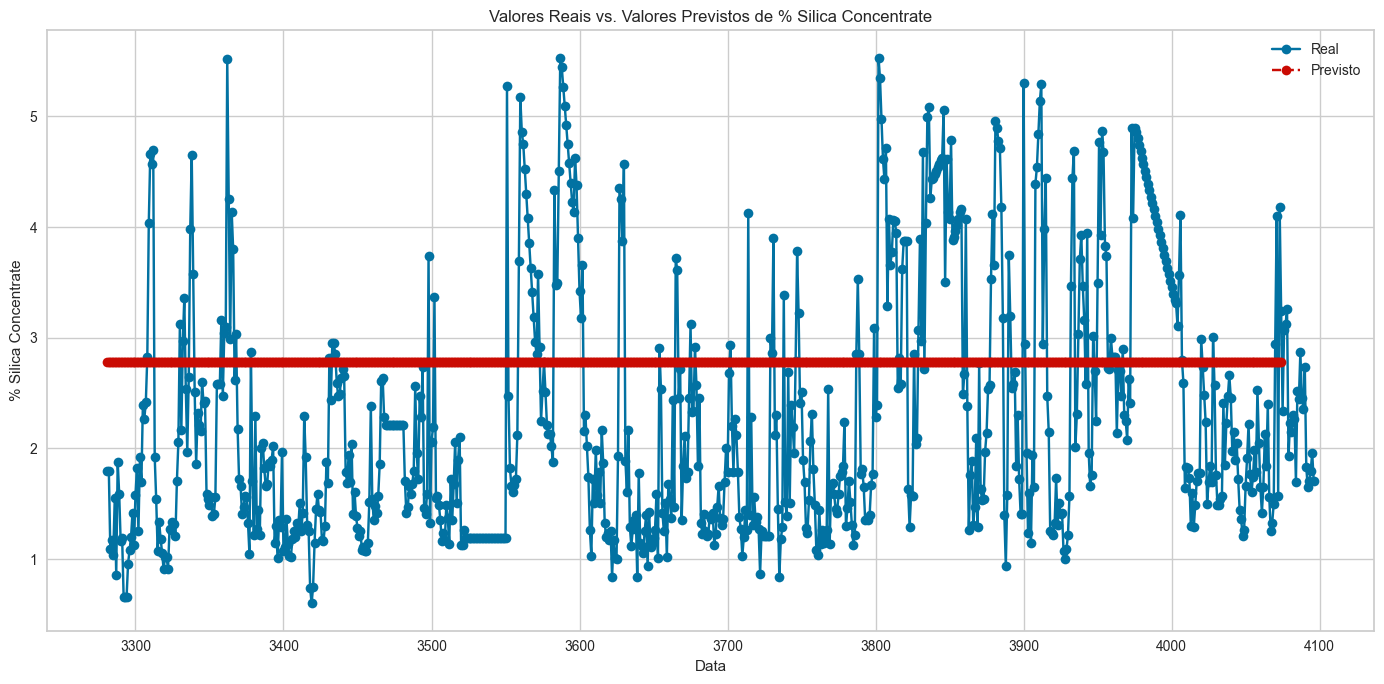

In [134]:
# Comparar as previsões com os valores reais em um gráfico
plt.figure(figsize=(14, 7))
plt.plot(val_data.index, val_data['pct__Silica_Concentrate_mean'], marker='o', linestyle='-', color='b', label='Real')
plt.plot(y_pred_df.index, y_pred_df['pct__Silica_Concentrate_mean'], marker='o', linestyle='--', color='r', label='Previsto')
plt.title('Valores Reais vs. Valores Previstos de % Silica Concentrate')
plt.xlabel('Data')
plt.ylabel('% Silica Concentrate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [78]:
from pycaret.regression import *

In [99]:
numericals   = ['pct__Iron_Feed_mean',
'pct__Silica_Feed_mean',
'Starch_Flow_mean',
'Amina_Flow_mean',
'Ore_Pulp_Flow_mean',
'Ore_Pulp_pH_mean',
'Ore_Pulp_Density_mean',
'Flotation_Column_01_Air_Flow_mean',
'Flotation_Column_02_Air_Flow_mean',
'Flotation_Column_03_Air_Flow_mean',
'Flotation_Column_04_Air_Flow_mean',
'Flotation_Column_05_Air_Flow_mean',
'Flotation_Column_06_Air_Flow_mean',
'Flotation_Column_07_Air_Flow_mean',
'Flotation_Column_01_Level_mean',
'Flotation_Column_02_Level_mean',
'Flotation_Column_03_Level_mean',
'Flotation_Column_04_Level_mean',
'Flotation_Column_05_Level_mean',
'Flotation_Column_06_Level_mean',
'Flotation_Column_07_Level_mean',
'pct__Iron_Concentrate_mean'
              ]
ignore = ['date']     


In [100]:
# experience1 = no preprocessing
exp1 = RegressionExperiment() 
exp1.setup(train_data, ignore_features=ignore, target= 'pct__Silica_Concentrate_mean', session_id=555, train_size=0.7, preprocess=False, numeric_features=numericals)


,Description,Value
0,Session id,555
1,Target,pct__Silica_Concentrate_mean
2,Target type,Regression
3,Original data shape,"(3281, 24)"
4,Transformed data shape,"(3281, 23)"
5,Transformed train set shape,"(2296, 23)"
6,Transformed test set shape,"(985, 23)"
7,Ignore features,1
8,Numeric features,22


In [101]:
exp1.models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [102]:
exp1.compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.3673,0.2775,0.5255,0.7788,0.1500,0.1722,0.8810
catboost,CatBoost Regressor,0.3769,0.2783,0.5263,0.7783,0.1507,0.1768,6.7040
lightgbm,Light Gradient Boosting Machine,0.3870,0.2968,0.5435,0.7631,0.1552,0.1809,0.2510
gbr,Gradient Boosting Regressor,0.4022,0.3065,0.5525,0.7558,0.1580,0.1895,1.0080
rf,Random Forest Regressor,0.3986,0.3107,0.5563,0.7519,0.1582,0.1873,2.7180
ridge,Ridge Regression,0.4919,0.4086,0.6386,0.6740,0.1867,0.2371,0.0260
lr,Linear Regression,0.4919,0.4087,0.6387,0.6739,0.1867,0.2370,1.8850
br,Bayesian Ridge,0.4924,0.4088,0.6388,0.6737,0.1866,0.2373,0.0210
lar,Least Angle Regression,0.5070,0.4338,0.6570,0.6533,0.1973,0.2479,0.0240
ada,AdaBoost Regressor,0.5482,0.4491,0.6697,0.6418,0.2038,0.2943,0.3410


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=555)

In [103]:
modelo_reg = exp1.create_model('et')
modelo_reg 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3457,0.2450,0.4950,0.8305,0.1455,0.1680
1,0.3502,0.2418,0.4917,0.7960,0.1414,0.1625
2,0.3420,0.2241,0.4734,0.8202,0.1366,0.1564
3,0.3597,0.2593,0.5092,0.7903,0.1520,0.1799
4,0.3924,0.3044,0.5518,0.7396,0.1564,0.1790
5,0.3901,0.3455,0.5878,0.7555,0.1546,0.1713
6,0.3905,0.3289,0.5735,0.7424,0.1590,0.1788
7,0.3743,0.2767,0.5260,0.7735,0.1498,0.1727
8,0.3532,0.2469,0.4969,0.7848,0.1462,0.1728


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=555)

In [104]:
y_predito = exp1.predict_model(modelo_reg)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.3490,0.2450,0.4950,0.8017,0.1425,0.1643


In [105]:
exp1.save_model(modelo_reg, 'melhor_modelo_reg', model_only=True)

Model Successfully Saved


(ExtraTreesRegressor(n_jobs=-1, random_state=555), 'melhor_modelo_reg.pkl')

In [106]:
with open('melhor_modelo_reg.pkl', 'wb') as file:
    pickle.dump(modelo_carregado, file)

In [107]:
modelo_carregado = exp1.load_model('melhor_modelo_reg')

Transformation Pipeline and Model Successfully Loaded


In [108]:
# Carregar o modelo treinado
with open('melhor_modelo_reg.pkl', 'rb') as file:
    modelo_carregado = pickle.load(file)

In [109]:
# Supondo que 'test_data' seja o conjunto de dados de validação e 'X_test' seja preparado corretamente
# Definir o horizonte de previsão
fh = range(1, len(val_data) + 1)

In [110]:
# Garantir que 'X_test' não inclua a coluna de destino
X_test = val_data.drop(columns=['pct__Silica_Concentrate_mean'])

In [111]:
# Prever usando o modelo carregado
y_predito = modelo_carregado.predict(fh=fh, X=X_test)

In [112]:
# Converter as previsões para um DataFrame
y_pred_df = pd.DataFrame(y_predito, index=val_data.index, columns=['pct__Silica_Concentrate_mean'])

In [113]:
y_pred_df

,pct__Silica_Concentrate_mean
3281,2.780773
3282,2.780773
3283,2.780773
3284,2.780773
3285,2.780773
...,...
4092,NaN
4093,NaN
4094,NaN
4095,NaN


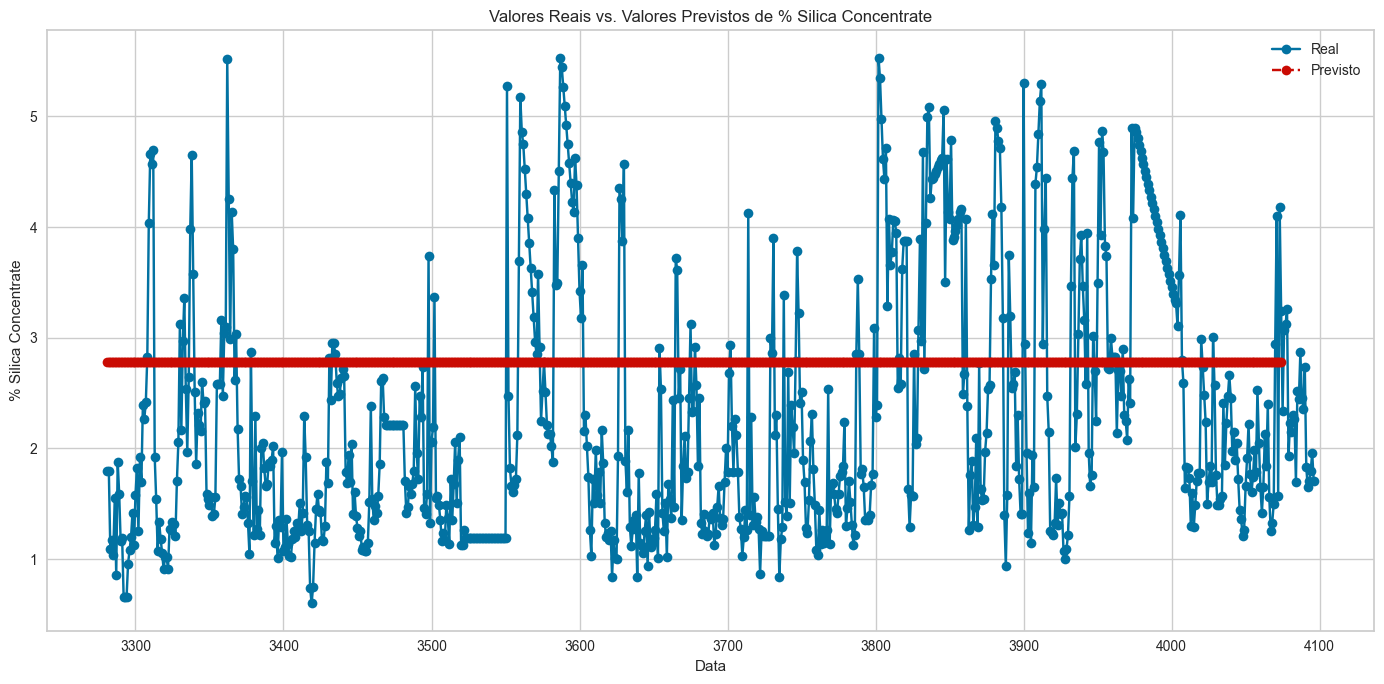

In [114]:
# Comparar as previsões com os valores reais em um gráfico
plt.figure(figsize=(14, 7))
plt.plot(val_data.index, val_data['pct__Silica_Concentrate_mean'], marker='o', linestyle='-', color='b', label='Real')
plt.plot(y_pred_df.index, y_pred_df['pct__Silica_Concentrate_mean'], marker='o', linestyle='--', color='r', label='Previsto')
plt.title('Valores Reais vs. Valores Previstos de % Silica Concentrate')
plt.xlabel('Data')
plt.ylabel('% Silica Concentrate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()